## Importing Important Libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize, OneHotEncoder
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, mean_absolute_error, root_mean_squared_error, r2_score, log_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

## Simple LinearRegression using function

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

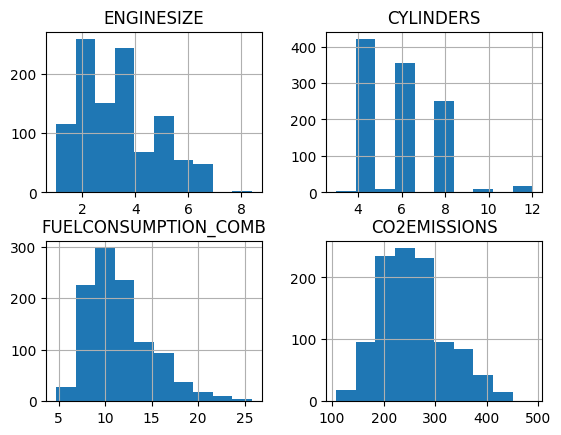

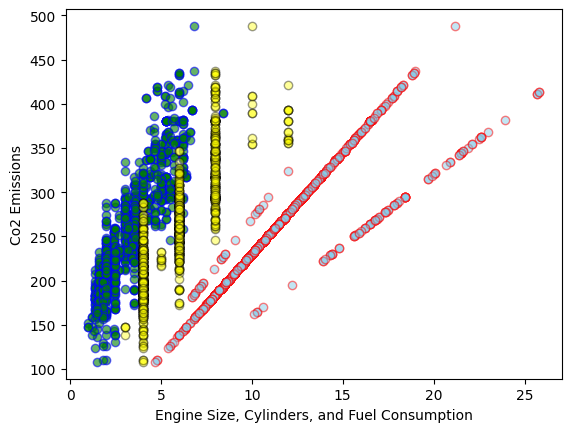

Coefficient: 38.992978724434046 
Intercept: 126.2897021740873
MSE: 985.938
RMSE: 31.4
MAE: 24.097
R2_Score: 0.762


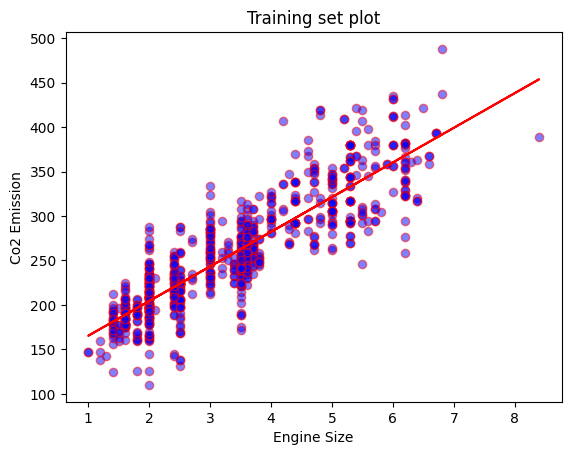

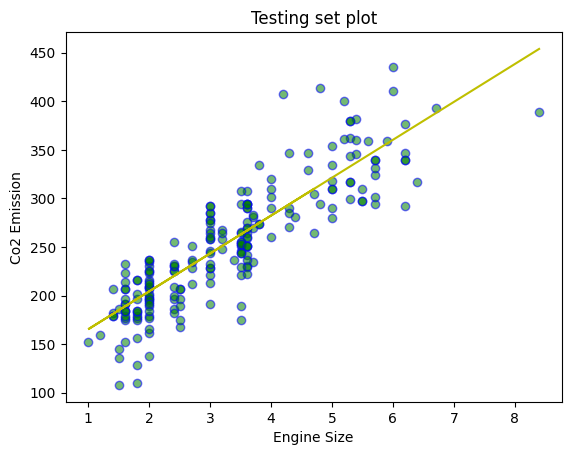

In [3]:
file_path_1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
def simple_linear_regression(file_path, test_size):
    df = pd.read_csv(file_path, encoding='utf-8')
    print(df.head())
    df_cor = df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'])
    print(f"Correlation between features: \n{df_cor.corr()['CO2EMISSIONS']}")
    df_imp = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
    df_imp.hist()

    # Trying more visualization
    fig, ax = plt.subplots()
    ax.scatter(df_imp['FUELCONSUMPTION_COMB'], df_imp['CO2EMISSIONS'], color='skyblue', alpha=0.5, ec='r')
    ax.scatter(df_imp['ENGINESIZE'], df_imp['CO2EMISSIONS'], color='green', alpha=0.6, ec='blue')
    ax.scatter(df_imp['CYLINDERS'], df_imp['CO2EMISSIONS'], color='yellow', alpha=0.4, ec='k')
    ax.set_xlabel('Engine Size, Cylinders, and Fuel Consumption')
    ax.set_ylabel('Co2 Emissions')
    plt.show()

    # Separating X and y data
    X = df_imp['ENGINESIZE'].to_numpy()
    y = df_imp['CO2EMISSIONS'].to_numpy()

    # Splitting train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), y_train)
    coeff = model.coef_
    intercept = model.intercept_
    print(f'Coefficient: {coeff[0]} \nIntercept: {intercept}')

    # Visualizing training sets
    fig1, ax1 = plt.subplots(1, 1)
    ax1.scatter(X_train, y_train, color='blue', alpha=0.5, ec='red')
    ax1.plot(X_train, coeff[0]*X_train+intercept, '-r')
    ax1.set_title('Training set plot')
    ax1.set_xlabel('Engine Size')
    ax1.set_ylabel('Co2 Emission')

    # Visualizing test sets
    fig2, ax2 = plt.subplots(1, 1)
    ax2.scatter(X_test, y_test, color='green', alpha=0.55, ec='blue')
    ax2.plot(X_test, coeff[0]*X_test+intercept, '-y')
    ax2.set_title("Testing set plot")
    ax2.set_xlabel('Engine Size')
    ax2.set_ylabel('Co2 Emission')

    # Model prediction and evaluation
    y_pred = model.predict(X_test.reshape(-1, 1))
    print(f'MSE: {np.round(mean_squared_error(y_test, y_pred), 3)}')
    print(f'RMSE: {np.round(root_mean_squared_error(y_test, y_pred), 3)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.3f}')
    print('R2_Score: %.3f' % r2_score(y_test, y_pred))
simple_linear_regression(file_path=file_path_1, test_size=0.2)

## Multiple Linear Regression

Standardized data and their mean, std and other information
             0        1
count  1067.00  1067.00
mean      0.00    -0.00
std       1.00     1.00
min      -1.66    -2.07
25%      -0.95    -0.73
50%       0.04    -0.06
75%       0.67     0.61
max       3.57     4.50
Coefficients: [[ 25.27339614 -37.4381472 ]] 
Intercept: [256.29072488]
Original Coefficient: [[17.8581369  -5.01502179]] 
Original Intercept: [329.1363967]


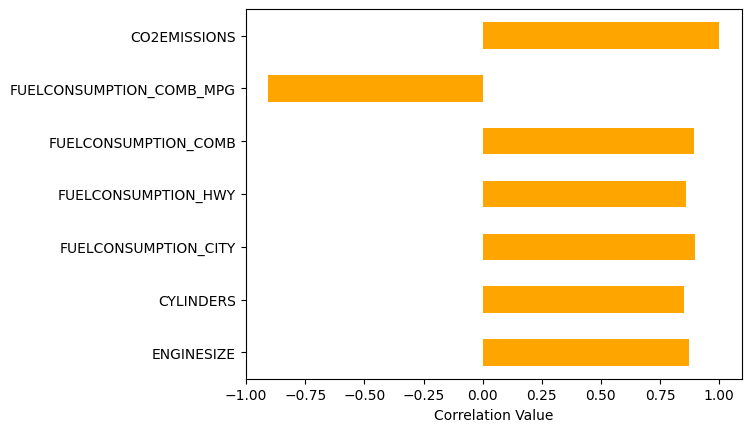

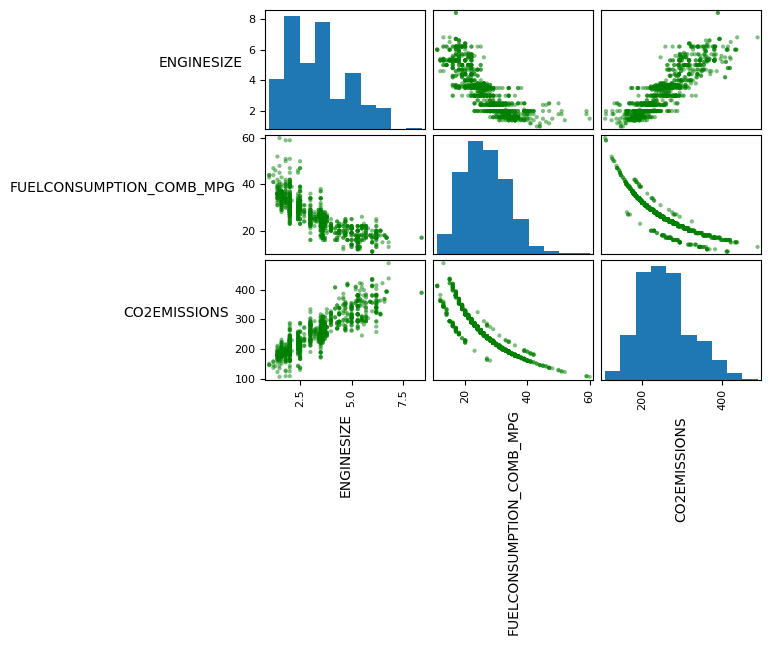

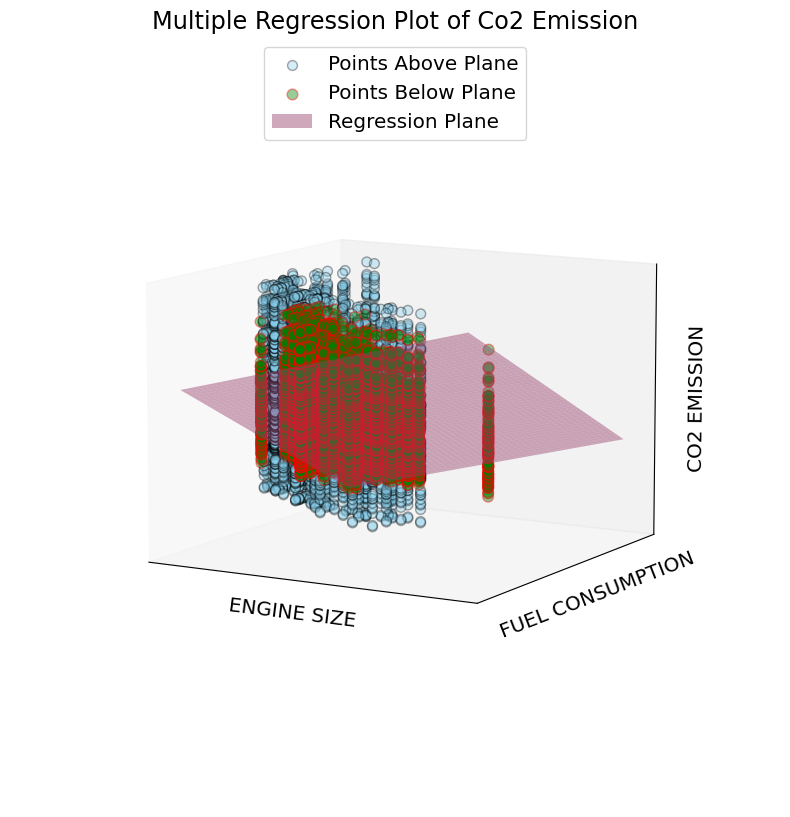

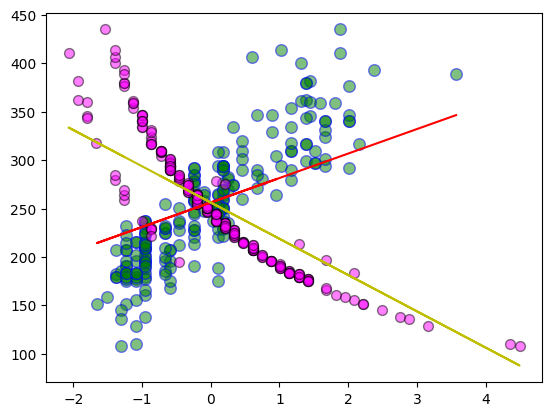

In [4]:
file_path_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
def multiple_linear_regression(file_path, test_size):
    df = pd.read_csv(file_path_2, encoding='utf-8')
    categorical_features = []
    numerical_features = []
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            numerical_features.append(label)
        else:
            categorical_features.append(label)
    numerical_features.remove('MODELYEAR')

    # Visualizing correlation
    corr_features = df[numerical_features].corr()['CO2EMISSIONS']
    corr_features.plot(kind='barh', color='orange')
    plt.xlabel('Correlation Value')

    # Dropping categorical features
    df_temp = df.drop(columns=categorical_features)

    # Dropping unnecessary features i.e. with low correlation
    df_temp = df_temp.drop(columns=['MODELYEAR', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'])
    
    # Visualizing the contributing factors
    plot = pd.plotting.scatter_matrix(df_temp, alpha=0.5, color='green')
    for ax in plot.flatten():
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
    plt.gcf().subplots_adjust(wspace=0.05, hspace=0.05)

    # Separating X and y features
    X = df_temp.iloc[:, [0, 1]].to_numpy()
    y = df_temp.iloc[:, [2]].to_numpy()

    # Standardize data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Checking the standardized data
    print('Standardized data and their mean, std and other information')
    print(pd.DataFrame(X_std).describe().round(2))

    # Splitting train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_size, random_state=42)

    # Model building
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculating coefficient and intercept: these are standardized coefficients and intercepts
    coeff = model.coef_
    intercept = model.intercept_
    print(f'Coefficients: {coeff} \nIntercept: {intercept}')

    # Evaluating original coefficients and intercept
    means_ = scaler.mean_
    stds_ = np.sqrt(scaler.var_)
    original_coeff = coeff/stds_
    original_intercept = intercept-np.sum((means_*coeff)/stds_)
    print(f'Original Coefficient: {original_coeff} \nOriginal Intercept: {original_intercept}')

    # Visualizing Result (First Splitting two features in X1 and X2)
    X1 = X_test[:, 0] if X_test.ndim>1 else X_test
    X2 = X_test[:, 1] if X_test.ndim>1 else np.zeros_like(X1)

    # Creating surface
    X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                                   np.linspace(X2.min(), X2.max(), 100))
    y_surf = model.intercept_[0]+model.coef_[0, 0]*X1_surf+model.coef_[0, 1]*X2_surf

    # Finding prediction result and compare with original test data to set if point is above prediction line or below
    y_pred = model.predict(X_test.reshape(-1, 1)) if X_test.ndim==1 else model.predict(X_test)
    above_plane = y_test>=y_pred
    below_plane = y_test<y_pred
    above_plane = above_plane[:, 0]
    below_plane = below_plane[:, 0]

    #Creating subplot and visualizing result
    fig = plt.figure(figsize=(20, 10))
    plots = fig.add_subplot(111, projection='3d') 

    plots.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], color='skyblue', alpha=0.35, ec='k', s=50, label='Points Above Plane')
    plots.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], color='green', alpha=0.40, ec='red', s=60, label='Points Below Plane')

    # Creating the regression plane
    plots.plot_surface(X1_surf, X2_surf, y_surf, color='hotpink', alpha=0.45, label='Regression Plane')
    plots.view_init(elev=10)
    
    plots.legend(fontsize='x-large', loc='upper center')
    plots.set_xticks([])
    plots.set_yticks([])
    plots.set_zticks([])
    plots.set_xlabel('ENGINE SIZE', fontsize='x-large')
    plots.set_ylabel('FUEL CONSUMPTION', fontsize='x-large')
    plots.set_zlabel('CO2 EMISSION', fontsize='x-large')
    plots.set_box_aspect(None, zoom=0.75)
    plots.set_title('Multiple Regression Plot of Co2 Emission', fontsize='xx-large')

    # Checking individual feature and response with target feature
    fig_1, ax_1 = plt.subplots()
    ax_1.scatter(X_test[:, 0], y_test, color='green', alpha=0.5, s=70, ec='blue')
    ax_1.plot(X_test[:, 0], model.intercept_[0]+model.coef_[0, 0]*X_test[:, 0], '-r')
    ax_1.scatter(X_test[:, 1], y_test, color='magenta', alpha=0.5, s=50, ec='k')
    ax_1.plot(X_test[:, 1], model.intercept_[0]+model.coef_[0, 1]*X_test[:, 1], '-y')

multiple_linear_regression(file_path=file_path_2, test_size=0.2)

## Logistic Regression

Log Loss value:  0.49836180846147


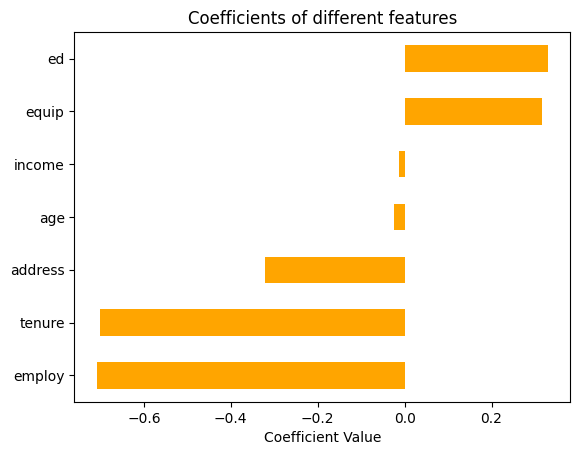

In [5]:
file_path_3 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
def logistic_regression(filepath, test_size):
    df = pd.read_csv(file_path_3)
    
    # Taking few samples for model building
    churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
    churn_df['churn'] = churn_df['churn'].astype('int')
    
    # Separating X and y data
    X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
    y = np.asarray(churn_df['churn'])

    # Standardize data
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Splitting train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=test_size, random_state=35)

    # Model building 
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculating coefficients and visualize result
    coefficients = pd.Series(model.coef_[0], churn_df.columns[:-1])
    coefficients.sort_values().plot(kind='barh', color='orange')
    plt.title('Coefficients of different features')
    plt.xlabel('Coefficient Value')

    # Calculating log_loss
    log_loss_value = log_loss(y_test, y_pred_proba)
    print('Log Loss value: ', log_loss_value)

logistic_regression(filepath=file_path_3, test_size=0.2)

## Multiclass Classification

One-Vs-All Accuracy Score: 76.123%
One-Vs-One Accuracy Score: 92.199%


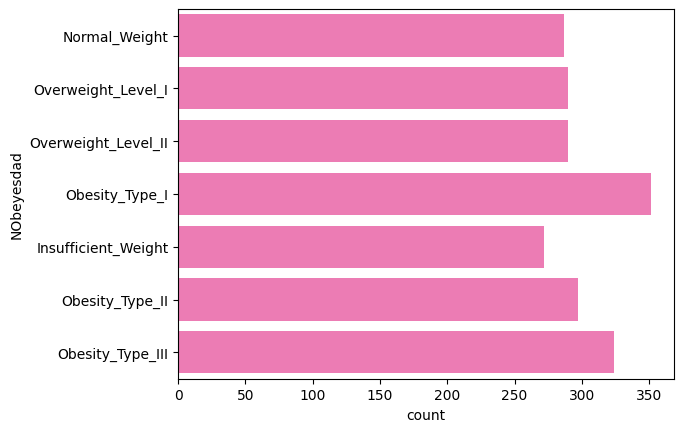

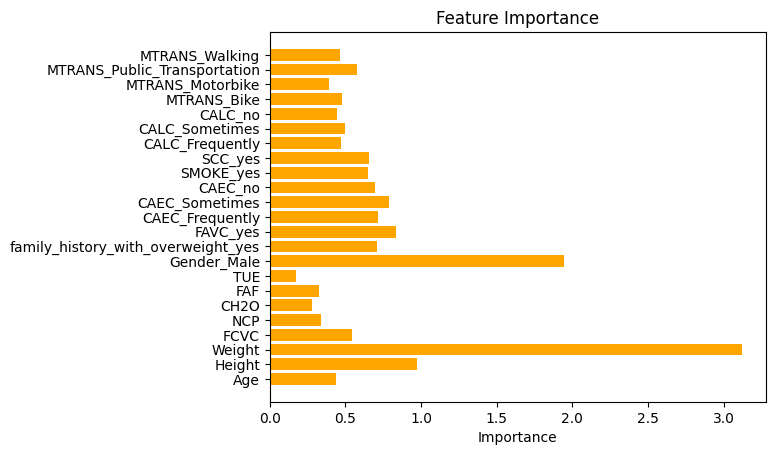

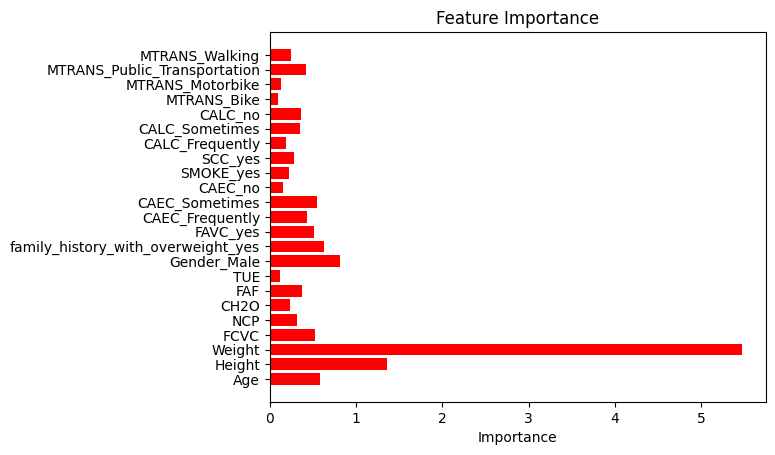

In [6]:
file_path_4 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
def multiclass_classification(file_path, test_size):
    df = pd.read_csv(file_path_4)

    #Count plot using seaborn
    sns.countplot(data=df, y='NObeyesdad', color='hotpink')

    # Let's split numerical features and standardize data and concat back to original dataframe
    numerical_features = df.select_dtypes(include='number').columns.to_list()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_features])
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(numerical_features))
    scaled_data = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)

    # Let's split categorical features and encode back to numerical values and concat back to original dataframe
    categorical_features = scaled_data.select_dtypes(include='object').columns.to_list()
    categorical_features.remove('NObeyesdad')
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
    processed_data = pd.concat([scaled_data.drop(columns=categorical_features), encoded_df], axis=1)

    # Converting target feature to numeric features
    processed_data['NObeyesdad'] = processed_data['NObeyesdad'].astype('category').cat.codes

    # Separating X and y
    X = processed_data.drop(columns='NObeyesdad')
    y = processed_data['NObeyesdad'].astype(int)
    
    # Splitting training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    # `Stratify` will make the class balance i.e. it will equally balance the classes in training and testing sets. It prevents training set will have only class=0 features and test will only have class=1 features

    # Building model for one vs all or one vs rest
    model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_ovr.fit(X_train, y_train)
    y_pred_ovr = model_ovr.predict(X_test)

    # Evaluates model with accuracy score
    accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
    print(f'One-Vs-All Accuracy Score: {100*accuracy_ovr:.3f}%')

    # Building model for One-Vs-One strategy
    model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo.fit(X_train, y_train)
    y_pred_ovo = model_ovo.predict(X_test)

    # Evaluate model with accuracy score
    accuracy_ovo = np.round(100*accuracy_score(y_test, y_pred_ovo), 3)
    print(f'One-Vs-One Accuracy Score: {accuracy_ovo}%')

    # Calculating feature importance and visualizing for One-Vs-All
    feature_importance_ovr = np.mean(np.abs(model_ovr.coef_), axis=0)
    fig_ovr, ax_ovr = plt.subplots()
    ax_ovr.barh(X.columns, feature_importance_ovr, color='orange')
    ax_ovr.set_title('Feature Importance')
    ax_ovr.set_xlabel('Importance')

    # Calculating feature importance and visualizing for One-Vs-One
    coefficients = [est.coef_.flatten() for est in model_ovo.estimators_]
    coefficients = np.array(coefficients)
    feature_importance_ovo = np.mean(np.abs(coefficients), axis=0)
    fig_ovo, ax_ovo = plt.subplots()
    ax_ovo.barh(X.columns, feature_importance_ovo, color='red')
    ax_ovo.set_title('Feature Importance')
    ax_ovo.set_xlabel('Importance')
    plt.show()
multiclass_classification(file_path=file_path_4, test_size=0.2)

## Decision Tree

Accuracy Score: 100.0%


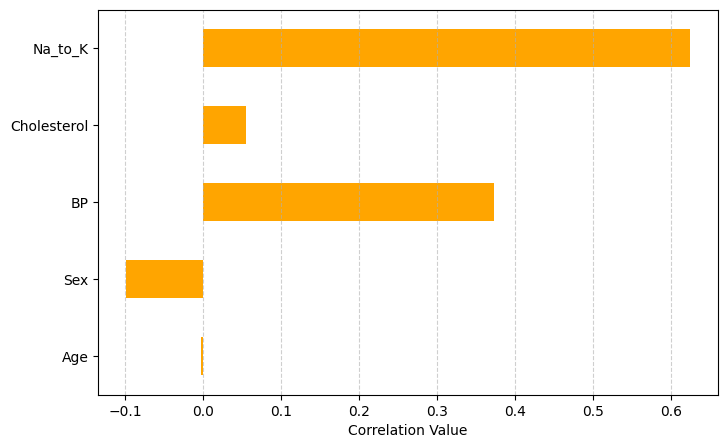

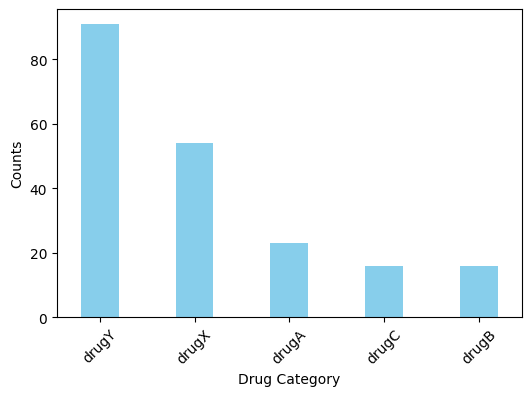

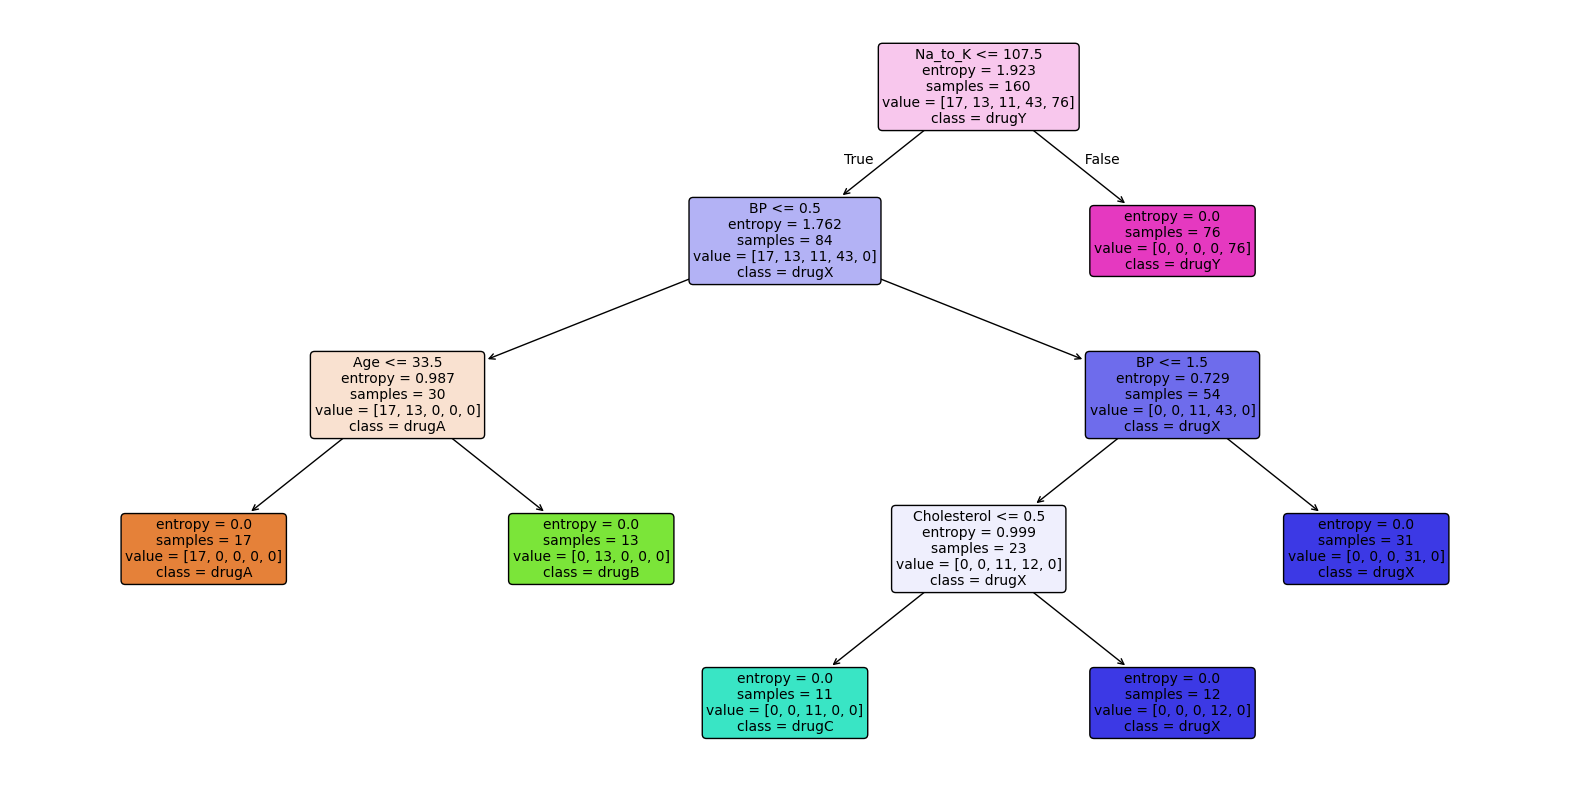

In [7]:
file_path_5 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
def decision_tree(file_path, test_size):
    df = pd.read_csv(file_path)

    # Data preprocessing
    encoder = LabelEncoder()
    categorical_features = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, object)).all()]
    categorical_features.remove('Drug')
    for label in categorical_features:
        df[label] = encoder.fit_transform(df[label])
    # Converting target features to numeric type
    custom_mapping = {'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4}
    df['Drug_num'] = df['Drug'].map(custom_mapping)
    
    # Visualizing correlation
    plt.figure(figsize=(8, 5))
    df.drop('Drug', axis=1).corr()['Drug_num'].drop('Drug_num').plot(kind='barh', color='orange')
    plt.xlabel('Correlation Value')
    plt.grid(axis='x', ls='--', alpha=0.6)

    # Visualizing category distribution
    plt.figure(figsize=(6, 4))
    unique_cat_counts = df['Drug'].value_counts(ascending=False)
    unique_cat_counts.plot(kind='bar', color='skyblue', width=0.4)
    plt.xticks(rotation=45)
    plt.xlabel('Drug Category')
    plt.ylabel('Counts')

    # Separating X and y data
    X = df.drop(['Drug', 'Drug_num'], axis=1)
    y = df.Drug

    # Splitting train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model Building 
    model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    model.fit(X_train, y_train)

    # Model evaluation using accuracy score
    y_pred = model.predict(X_test)
    score = np.round(100*accuracy_score(y_test, y_pred), 3)
    print(f'Accuracy Score: {score}%')

    # Visualize Tree
    plt.figure(figsize=(20, 10))
    plot_tree(model,
              feature_names=X.columns,
              class_names= [str(cls) for cls in model.classes_],
              filled=True,
              rounded=True,
              fontsize=10)
    plt.show()


decision_tree(file_path=file_path_5, test_size=0.2)

## Regression Tree & Decision Tree

Accuracy Score: 24.8
R^2_Score: 0.022


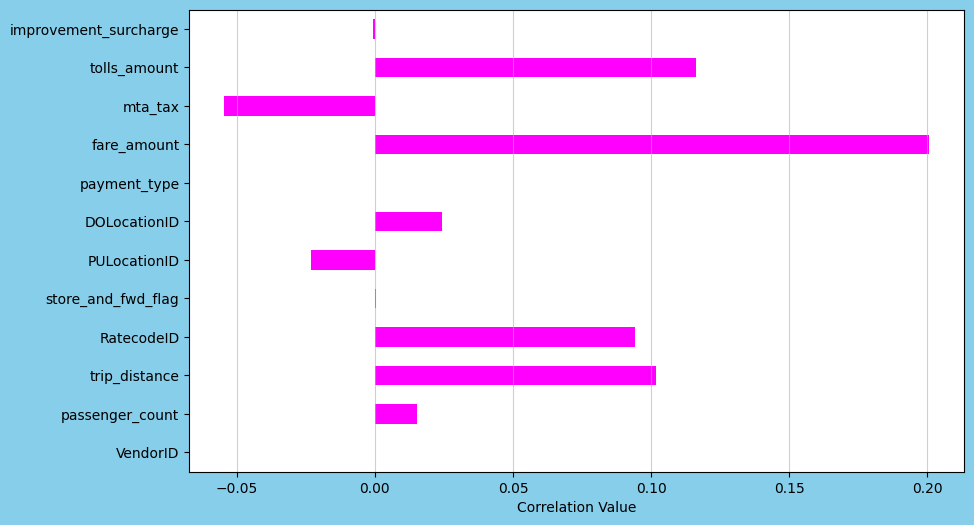

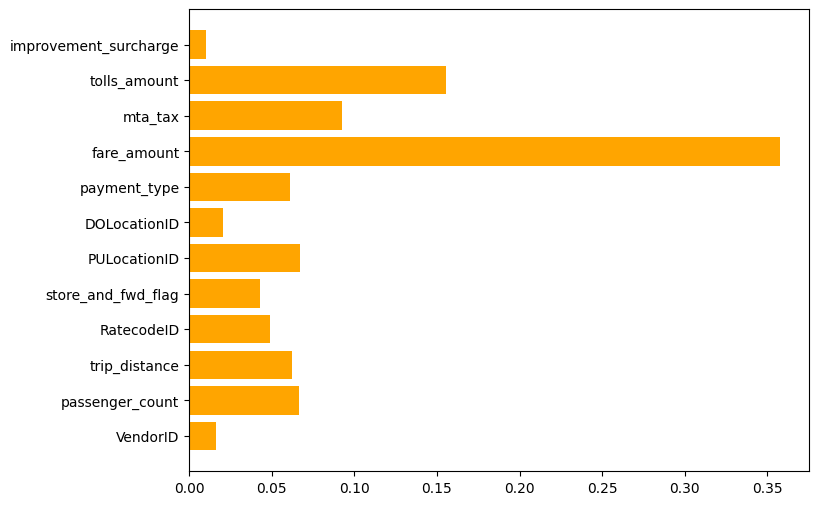

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64


In [25]:
file_path_6 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
def regression_tree(file_path, test_size):
    df = pd.read_csv(file_path)

    # Visualizing Correlation
    corr_data = df.corr()['tip_amount'].drop('tip_amount')
    plt.figure(figsize=(10, 6), facecolor='skyblue')
    corr_data.plot(kind='barh', color='magenta')
    plt.xlabel('Correlation Value')
    plt.grid(axis='x', alpha=0.6)

    # Data Preprocessing
    y = df['tip_amount'].values.astype('float32')
    X = df.drop(columns='tip_amount').values

    # Normalize data
    X = normalize(X, norm='l1', copy=False)

    # Splitting train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=35)

    # Model building: Regression Tree is Decision Tree and criterion controls the tree
    model_dt = DecisionTreeRegressor(criterion='squared_error', max_depth=8, random_state=42)
    model_dt.fit(X_train, y_train)

    # Evaluating model using mean_squared_error and r^2_score
    y_pred_dt = model_dt.predict(X_test)
    accuracy_score = np.round(mean_squared_error(y_test, y_pred_dt), 3)
    print(f'Accuracy Score: {accuracy_score}')

    r2_score = np.round(model_dt.score(X_test, y_test), 3)
    print(f'R^2_Score: {r2_score}')

    # Finding feature importances
    importances_dt = model_dt.feature_importances_
    names_dt = df.columns.to_list()
    names_dt.remove('tip_amount')
    feature_importance_dt = pd.DataFrame({'Features':names_dt, 'Importance':importances_dt})
    plt.figure(figsize=(8, 6))
    plt.barh(feature_importance_dt['Features'], feature_importance_dt['Importance'], color='orange')
    plt.show()

    # Top 3 most contributing factors with correlation
    top_3 = df.corr()['tip_amount'].drop('tip_amount')
    print(abs(top_3).sort_values(ascending=False)[:3])

regression_tree(file_path=file_path_6, test_size=0.2)

## Support Vector Machine

roc_auc_score: 0.961
roc_auc_score_svm: 0.984
roc_auc_score_dt: 0.952
roc_auc_score_svm: 0.929


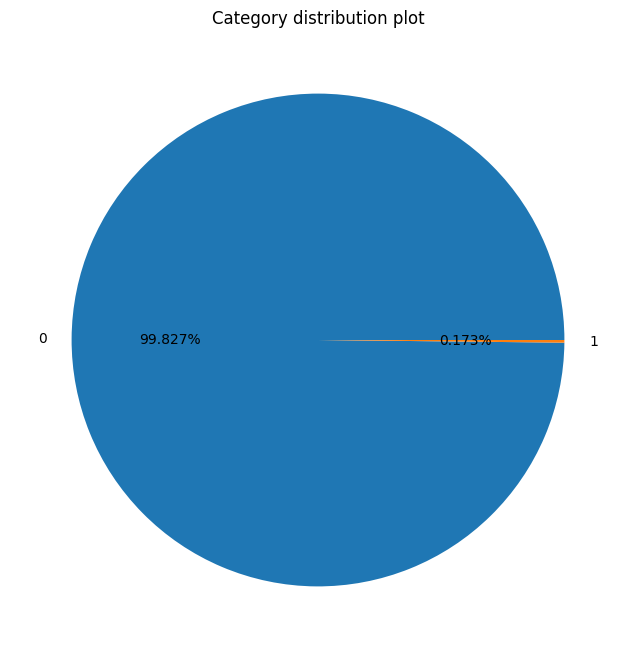

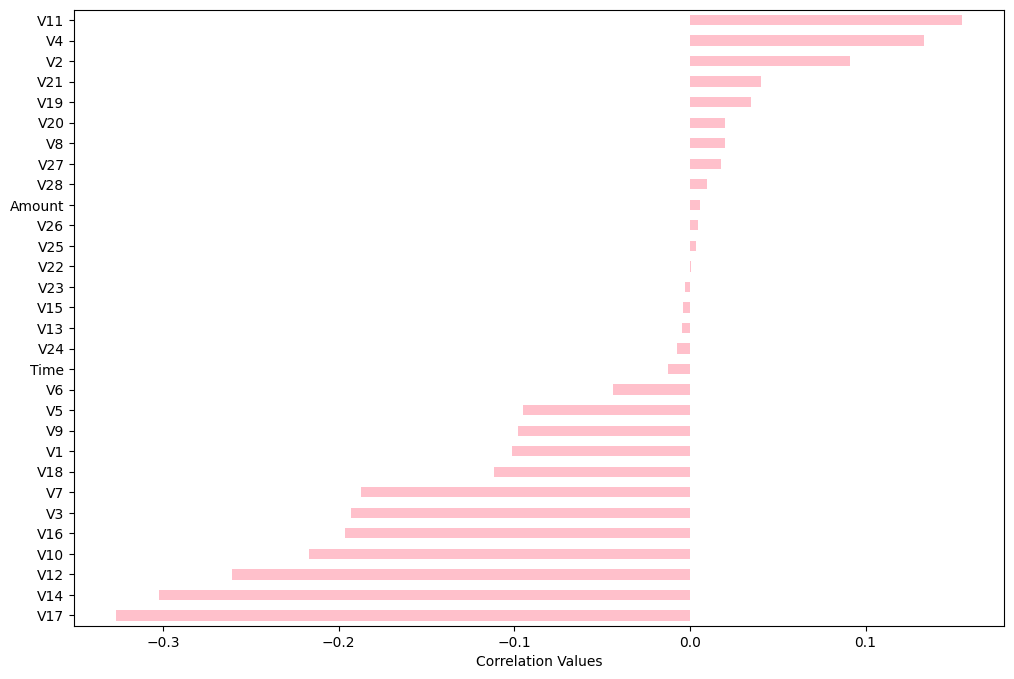

In [31]:
file_path_7 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
def support_vector(file_path, test_size):
    df = pd.read_csv(file_path)

    # Visualize target feature class and plot in pie chart
    label = df.Class.value_counts()
    plt.figure(figsize=(12, 8))
    plt.pie(label, labels=df.Class.unique(), autopct='%1.3f%%')
    plt.title('Category distribution plot')

    # Correlation values and correlation plot
    plt.figure(figsize=(12, 8))
    correlation_values = df.corr()['Class'].drop('Class')
    sorted_data = correlation_values.sort_values()
    sorted_data.plot(kind='barh', color='pink')
    plt.xlabel('Correlation Values')

    # Standardizing data
    scaler = StandardScaler()
    df.iloc[:, 1:30] = scaler.fit_transform(df.iloc[:, 1:30])
    
    # Separating X and y
    X = df.iloc[:, 1:30].values
    y = df.iloc[:, 30].values

    # Normalizing data
    X = normalize(X, norm='l1')

    # Splitting train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Evaluating weightage coefficient for preventing class imbalance
    w_train = compute_sample_weight('balanced', y_train)

    # Building model using decision tree
    model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=35)
    model_dt.fit(X_train, y_train, sample_weight=w_train)

    # Evaluating model using roc_auc_score
    y_pred_dt = model_dt.predict(X_test)
    y_pred_dt_proba = model_dt.predict_proba(X_test)[:, 1]

    roc_score = roc_auc_score(y_test, y_pred_dt_proba)
    print(f'roc_auc_score: {roc_score:.3f}')

    # Model building using SVM 
    model_svm = LinearSVC(class_weight='balanced', random_state=42, loss='hinge', fit_intercept=False)
    model_svm.fit(X_train, y_train)

    # Compute the probabilities of the test samples belonging to the class of fraudulent transactions
    y_pred_proba_svm = model_svm.decision_function(X_test)

    # Evaluating model using roc_auc_score
    roc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)
    print(f'roc_auc_score_svm: {roc_score_svm:.3f}')

    #Finding top 6 top correlated features
    correlation_values = abs(df.corr()['Class']).drop('Class')
    correlation_values = correlation_values.sort_values(ascending=False)[:6]
    correlation_values

    # Lets create different model for top6 correlated features
    def selected_features(test_size):
        X_6 = df.iloc[:,[3,10,12,14,16,17]].values
        X_6 = normalize(X_6, norm='l1')

        # Train/Test sets
        X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y, random_state=42, test_size=test_size)

        weight = compute_sample_weight('balanced', y_train_6)
        model_dt_6 = DecisionTreeClassifier(max_depth=4, random_state=42, criterion='entropy')
        model_dt_6.fit(X_train_6, y_train_6, sample_weight=weight)

        model_svm_6 = LinearSVC(class_weight='balanced', loss='hinge', fit_intercept=False)
        model_svm_6.fit(X_train_6, y_train_6)

        y_pred_proba_dt_6 = model_dt_6.predict_proba(X_test_6)[:, 1]
        print(f'roc_auc_score_dt: {np.round(roc_auc_score(y_test_6, y_pred_proba_dt_6), 3)}')

        y_pred_proba_svm_6 = model_svm_6.decision_function(X_test_6)
        print(f'roc_auc_score_svm: {np.round(roc_auc_score(y_test_6, y_pred_proba_svm_6), 3)}')
    selected_features(0.2)

support_vector(file_path=file_path_7, test_size=0.2)